In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
import numpy as np


In [4]:
df=pd.read_csv("/Users/miguelopez/Desktop/4-Proyecto ML/src/data_raw/Carbon Emission.csv")

In [5]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [6]:
df.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [7]:
# Features
features = df[['Vehicle Monthly Distance Km', 'Monthly Grocery Bill', 'Waste Bag Weekly Count', 
                 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour']]


In [8]:
# Scaling standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [9]:
# K values
inertia = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


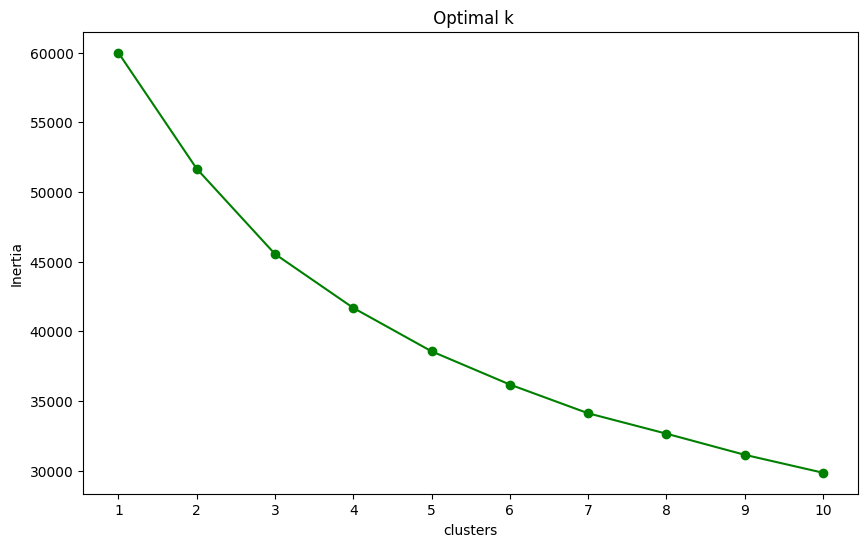

In [10]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='green')
plt.title(' Optimal k')
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()


In [11]:
# K=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
 

In [15]:
# clusters to df
df['cluster'] = clusters

In [16]:
# Percentage of observations in each cluster
cluster_pct = (df['cluster'].value_counts() / len(df)) * 100
cluster_pct

2    31.00
3    26.60
1    25.33
0    17.07
Name: cluster, dtype: float64

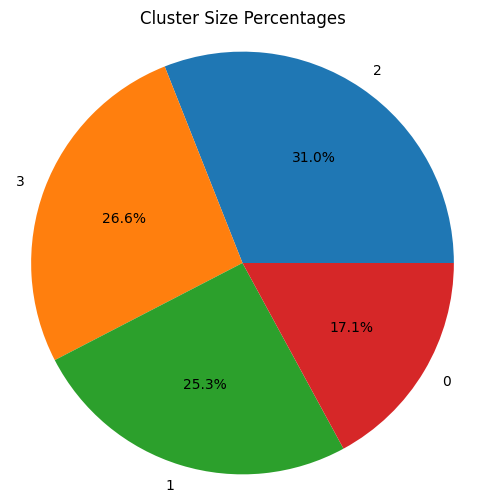

In [17]:
# Plot percentages
plt.figure(figsize=(6,6))
plt.pie(cluster_pct, labels=cluster_pct.index, autopct='%1.1f%%') 
plt.title('Cluster Size Percentages')
plt.axis('equal') 
plt.show()


In [ ]:
# cluster centers 
centers = kmeans.cluster_centers_

print("Cluster Centers:")
for i in range(len(centers)):
    print(f"Cluster {i}: {centers[i]}")

Cluster Centers:
Cluster 0: [ 1.97481894e+00  2.42181581e-02 -1.64808994e-02 -1.45213945e-03
 -4.90496621e-03 -1.19705856e-02]
Cluster 1: [-0.40655731  0.02759216  0.61936198  0.01589787  0.00308216  0.97263887]
Cluster 2: [-0.4080461  -0.01637871 -1.06604767  0.04775413  0.0726076  -0.01309571]
Cluster 3: [-0.40461085 -0.02274484  0.66253811 -0.06984829 -0.08437909 -0.90362763]


In [18]:

X = df[["CarbonEmission", "Vehicle Monthly Distance Km",
        'How Many New Clothes Monthly']]
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [22]:
# centroids positions 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[2132.36959064, 1702.12241715,   25.26822612],
       [2845.85753932, 5090.44033302,   25.80758557],
       [1882.51500096,  198.47639977,   24.83756927],
       [3830.84032114, 8392.08028546,   25.33809099]])

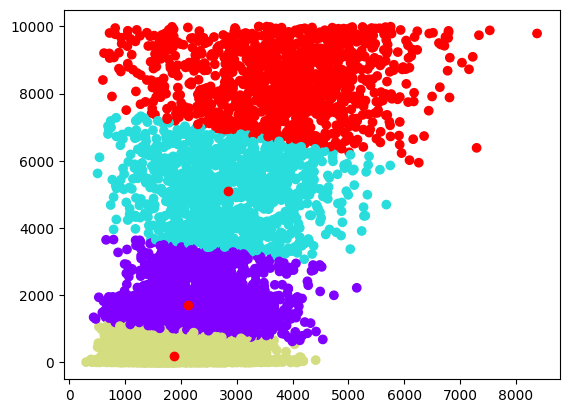

In [23]:
plt.scatter(X["CarbonEmission"], X["Vehicle Monthly Distance Km"], c=kmeans.labels_, cmap='rainbow')    
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()


In [43]:
score = calinski_harabasz_score(X, kmeans.labels_)
score

28151.8172231143

In [28]:
# PCA
from sklearn.decomposition import PCA
# fit 
pca = PCA()
pca.fit(X)
# transform 
X_pca = pca.transform(X)    

# fit kmeans on PCA 
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_pca)

KMeans(n_clusters=3)

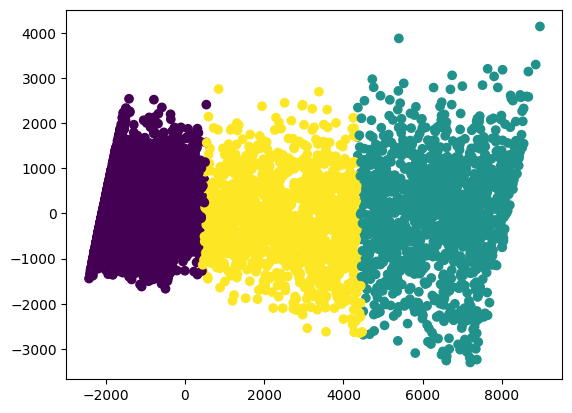

In [29]:
# plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)


In [30]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, kmeans.labels_)
print(score)    


0.6257181688464947


In [31]:
# DBSCAN
from sklearn.cluster import DBSCAN
# fit
dbscan = DBSCAN()
dbscan.fit(X_pca) 
# extract labels 
dbscan_labels = dbscan.labels_  
dbscan_labels


array([-1, -1, -1, ..., -1, -1, -1])

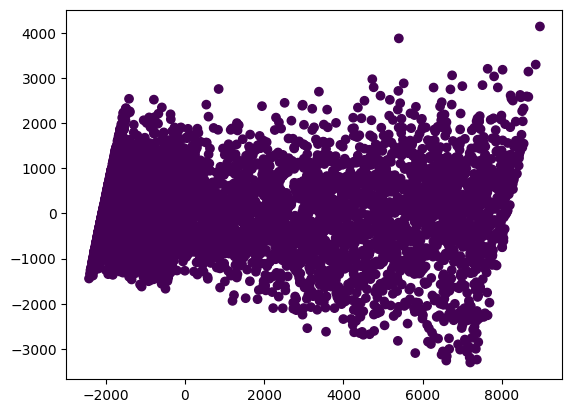

In [32]:
# db_scan Labels 
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_)


Text(0, 0.5, 'PCA Component 2')

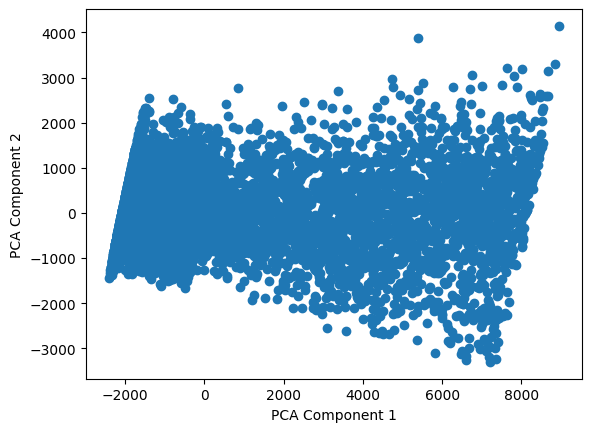

In [33]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [ ]:
# k-means again on the PCA transformed data 


In [34]:
# PCA transforom data / fit 

pca = PCA(n_components=2) 
pca.fit(X)
X_pca = pca.transform(X)


In [35]:
# Fit Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca) 


KMeans(n_clusters=3)

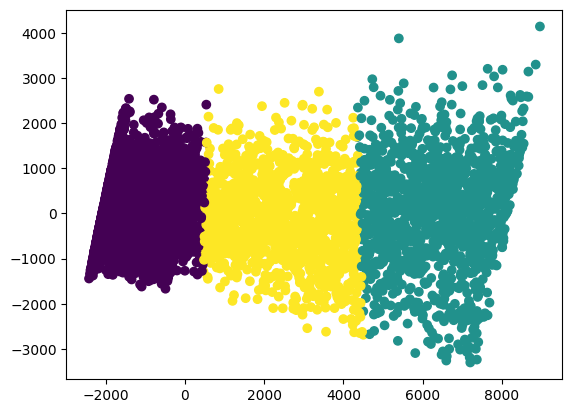

In [36]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)


In [37]:
score = silhouette_score(X_pca, kmeans.labels_)

print(score)


0.6265010001749763


In [39]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(X_pca, kmeans.labels_)
score

28156.174058919827

In [40]:
labels = kmeans.labels_
labels_series = pd.Series(labels)
cluster_pca = (labels_series.value_counts() / len(labels_series)) * 100
cluster_pca.sort_values(ascending=False)    

0    74.97
2    12.64
1    12.39
dtype: float64

<AxesSubplot: >

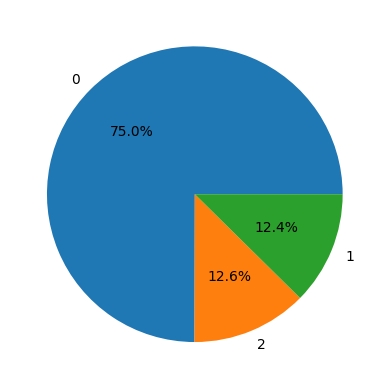

In [41]:
cluster_pca.plot.pie(autopct='%1.1f%%')

In [ ]:
import pickle

# Trained modelstored in 'kmeans'

# Save model to pickle file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file) 
